# **Pre-lab numeriacal assignment**

Abel Gangeskar Horneland

## Single slit

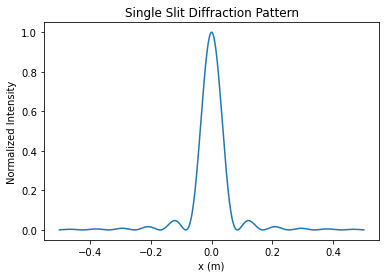

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
slit_width = 2e-6  # meters
wavelength = 532e-9  # meters
screen_distance = 1.0  # meters

# Define the normalized intensity function
def intensity(x):
    argument = np.pi * slit_width * x / (wavelength * screen_distance)
    sin_term = np.sinc(argument)
    return sin_term ** 2

# Define the range of x values to calculate intensity for
x_values = np.linspace(-0.5, 0.5, 1000)  # meters

# Calculate the normalized intensity
normalized_intensity = intensity(x_values) / intensity(0)

# Plot the results
plt.plot(x_values, normalized_intensity)
plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity')
plt.title('Single Slit Diffraction Pattern')
plt.show()

#### Fixed λ with gradually increasing D

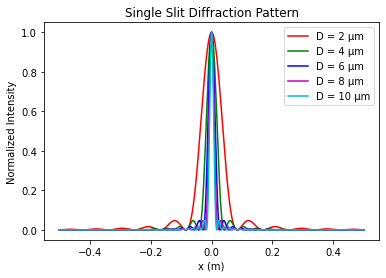

In [27]:
# Constants
wavelength = 532e-9  # meters
screen_distance = 1.0  # meters

# Define the normalized intensity function
def intensity(x, slit_width):
    argument = np.pi * slit_width * x / (wavelength * screen_distance)
    return (np.sinc(argument)) ** 2

# Define the range of x values to calculate intensity for
x_values = np.linspace(-0.5, 0.5, 1000)  # meters

# Calculate the normalized intensity for various slit widths
slit_widths = [2e-6, 4e-6, 6e-6, 8e-6, 10e-6]
colors = ['r', 'g', 'b', 'm', 'c']
for i in range(len(slit_widths)):
    normalized_intensity = intensity(x_values, slit_widths[i]) / intensity(0, slit_widths[i])
    plt.plot(x_values, normalized_intensity, color=colors[i], label=f'D = {slit_widths[i]*1e6:.0f} μm')
    
# Plot the results
plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity')
plt.title('Single Slit Diffraction Pattern')
plt.legend()
plt.show()

#### Fixed D gradually increasing λ

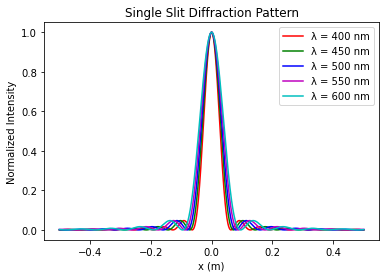

In [28]:
# Constants
slit_width = 2e-6  # meters
screen_distance = 1.0  # meters

# Define the normalized intensity function
def intensity(x, wavelength):
    argument = np.pi * slit_width * x / (wavelength * screen_distance)
    return (np.sinc(argument)) ** 2

# Define the range of x values to calculate intensity for
x_values = np.linspace(-0.5, 0.5, 1000)  # meters

# Calculate the normalized intensity for various wavelengths
wavelengths = [400e-9, 450e-9, 500e-9, 550e-9, 600e-9]
colors = ['r', 'g', 'b', 'm', 'c']
for i in range(len(wavelengths)):
    normalized_intensity = intensity(x_values, wavelengths[i]) / intensity(0, wavelengths[i])
    plt.plot(x_values, normalized_intensity, color=colors[i], label=f'λ = {wavelengths[i]*1e9:.0f} nm')
    
# Plot the results
plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity')
plt.title('Single Slit Diffraction Pattern')
plt.legend()
plt.show()

## Doubble slit (youngs expiriment)

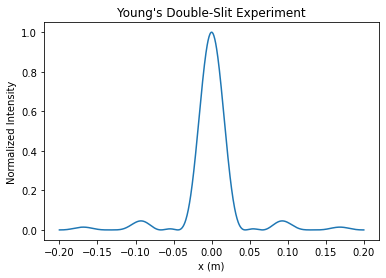

In [30]:
# Constants
wavelength = 532e-9  # meters
slit_width = 2e-6  # meters
slit_separation = 4e-6  # meters
num_slits = 3
screen_distance = 1  # meters

# Define the normalized intensity function for the double-slit experiment
def intensity_double_slit(x):
    k = 2 * np.pi / wavelength
    beta = k * slit_separation * x / screen_distance
    gamma = k * slit_width * x / screen_distance
    sin_term = np.sin(beta) / beta
    sin_term_squared = sin_term ** 2
    cos_term = np.cos(num_slits * gamma / 2)
    return sin_term_squared * cos_term ** 2

# Define the range of x values to evaluate the intensity function
x_vals = np.linspace(-0.2, 0.2, 1000)

# Calculate the normalized intensity values for the given x values
intensity_vals = intensity_double_slit(x_vals)

# Plot the results
plt.plot(x_vals, intensity_vals)
plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity')
plt.title('Young\'s Double-Slit Experiment')
plt.show()

#### Fixed λ and D increasing l

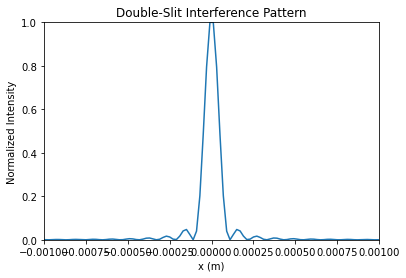

In [47]:

# Set constants
wavelength = 532e-9  # m
slit_width = 2e-6  # m
slit_sep = 4e-6  # m
num_slits = 3
screen_dist = 1  # m

# Set x range
x_vals = np.linspace(-0.01, 0.01, 1000)

# Calculate intensity
pi = np.pi
intensity = np.zeros(1000)
for i in range(1000):
    x = x_vals[i]
    intensity[i] = np.cos(pi*slit_width*x/(slit_sep*screen_dist*wavelength))**2 \
                    * np.sin(pi*num_slits*slit_sep/(slit_sep*screen_dist*wavelength))**2 \
                    / (pi*slit_width*x/(slit_sep*screen_dist*wavelength))**2

# Normalize intensity
intensity /= intensity.max()

# Plot results
plt.plot(x_vals, intensity)
plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity')
plt.title('Double-Slit Interference Pattern')
plt.xlim(-0.001, 0.001)
plt.ylim(0, 1)
plt.show()

#### Fixed λ, D and l, gradually increasing N

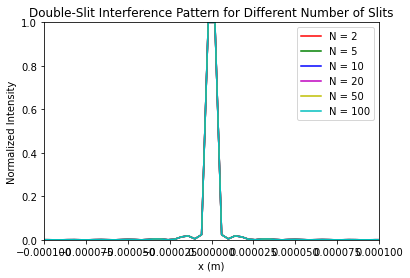

In [48]:
# Set constants
wavelength = 532e-9  # m
slit_width = 2e-6  # m
slit_sep = 4e-6  # m
screen_dist = 1  # m

# Set x range
x_min = -10e-3  # m
x_max = 10e-3  # m
num_points = 5000
x_vals = np.linspace(x_min, x_max, num_points)

# Calculate intensity for different values of N
N_values = [2, 5, 10, 20, 50, 100]
colors = ['r', 'g', 'b', 'm', 'y', 'c']
for i, num_slits in enumerate(N_values):
    pi = np.pi
    intensity = np.zeros(num_points)
    for j in range(num_points):
        x = x_vals[j]
        intensity[j] = np.cos(pi*slit_width*x/(slit_sep*screen_dist*wavelength))**2 \
                        * np.sin(pi*num_slits*slit_sep/(slit_sep*screen_dist*wavelength))**2 \
                        / (pi*slit_width*x/(slit_sep*screen_dist*wavelength))**2

    # Normalize intensity
    intensity /= intensity.max()

    # Plot results
    plt.plot(x_vals, intensity, color=colors[i], label='N = {}'.format(num_slits))

plt.xlabel('x (m)')
plt.ylabel('Normalized Intensity')
plt.title('Double-Slit Interference Pattern for Different Number of Slits')
plt.xlim(x_min/ 100, x_max / 100)
plt.ylim(0, 1)
plt.legend()
plt.show()